In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#КОД МАРКДАУН

In [2]:
data = pd.read_csv('train_data_tree.csv')
data.head()


,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [3]:
X = data[['sex', 'exang']] #шаг 1 - отделяем целевую переменную от предсказательных
Y = data.num

In [41]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy') #создаем классификатор

In [42]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

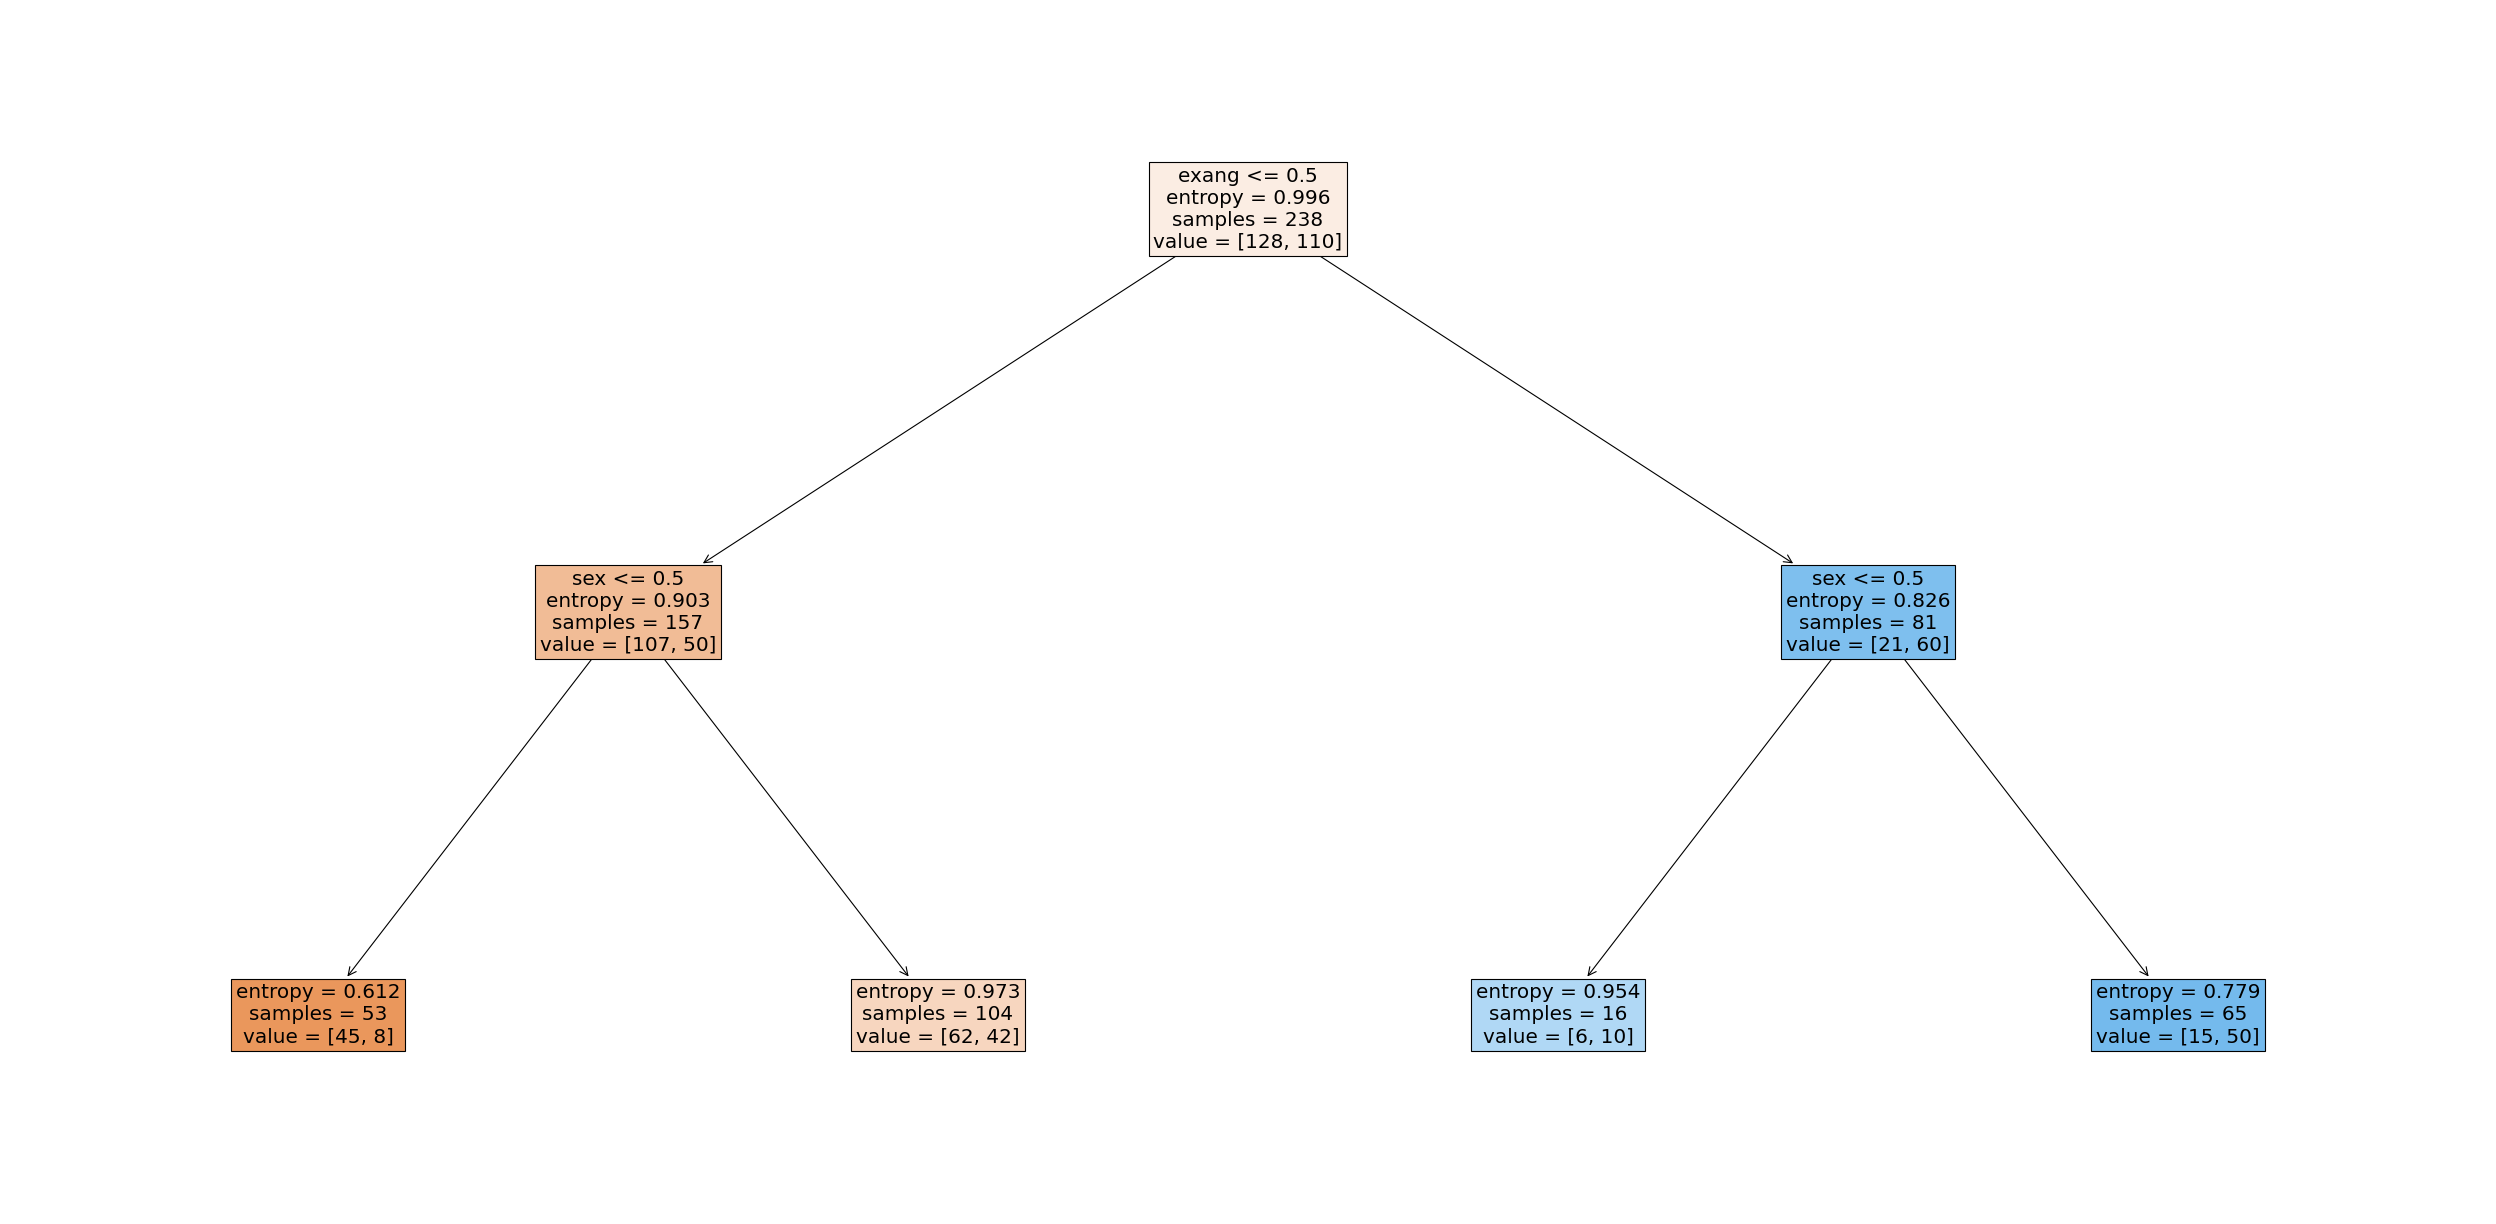

In [43]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=18,filled=True,feature_names=list(X))

In [44]:
l_node = clf.tree_.children_left[0]
r_node = clf.tree_.children_right[0] # индекс корня левого поддерева
n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в левом поддереве
e2 = clf.tree_.impurity[r_node] # энтропия в корне левого поддерева
print(n1, e1, n2, e2)

157 0.9027113410339267 81 0.8256265261578954


In [45]:
E = - (128/238) * np.log2(128/238) - (110/238) * np.log2(110/238)

IG = E - ((157 * 0.903 + 81 * 0.826)/(157 + 81))
print(IG)

0.11907587890578986


In [46]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
Y = iris.target

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [48]:
dt = tree.DecisionTreeClassifier()

In [49]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [50]:
predicted = dt.predict(X_test)
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [51]:
#GridSearchCv в действии
clf = tree.DecisionTreeClassifier()
params = {'max_depth' : range(1, 10), 'min_samples_split' : range(2, 10), 'min_samples_leaf' : range(1, 10)}
search = GridSearchCV(clf, params)
search.fit(X, Y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [52]:
best_tree = search.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=3)

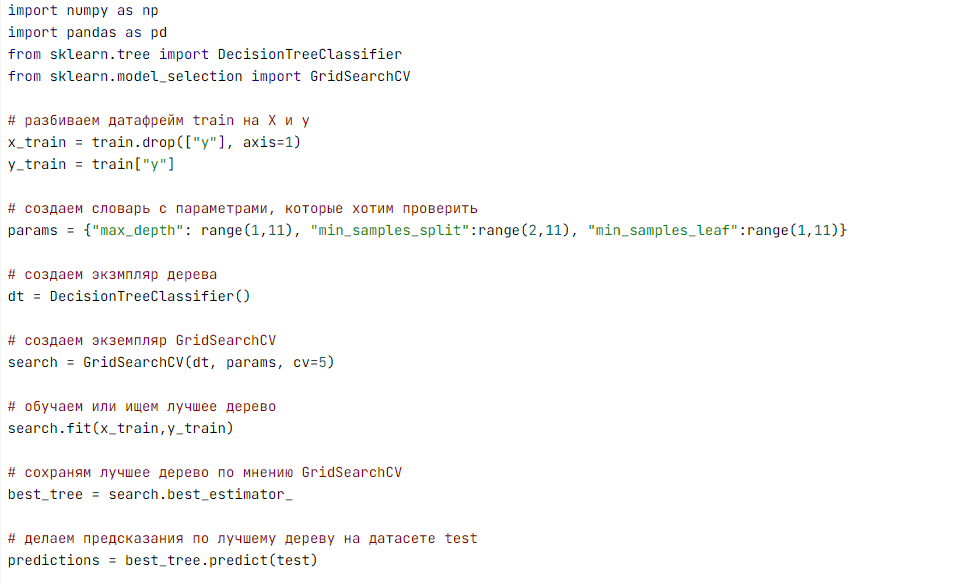

In [53]:
from IPython.display import Image
Image("GridSearchCV.png") #АЛГОРИТМ КАК РАБОТАЕТ

In [54]:
#random forest как работает
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [55]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]} #все как для одного дерева подбор параметров

In [56]:
grid_search_cv_clf = GridSearchCV(rf_clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, Y_train)
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [57]:
#Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf.
#Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [58]:
rf = RandomForestClassifier(n_estimators = 15, max_depth=5)
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [59]:
#задание - обучить лес на данных и подобрать параметры
mush = pd.read_csv('training_mush.csv')
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [11]:

parametrs = {'n_estimators': range(10, 50, 10), 'max_depth' : range(1, 12, 2), 'min_samples_leaf': range(1, 7)
                                , 'min_samples_split': (2, 9, 2)}



In [12]:
rand_clf = RandomForestClassifier(random_state = 0)
grid_search_clf = GridSearchCV(rand_clf, parametrs, cv=3, n_jobs=-1)


In [13]:
X_train = mush.drop('class', axis = 1)
y_train = mush['class']

In [14]:
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': (2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [15]:
grid_search_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [18]:
test = pd.read_csv('testing_mush.csv')
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [21]:
#предсказываем несъедобность грибов(считаем 1)
y_pred = grid_search_clf.predict(test)
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [ ]:
#строим матрицу ошибок


In [33]:
testing_y_mush = pd.read_csv('testing_y_mush.csv')
testing_y_mush.head()

,class
0,0
1,0
2,1
3,1
4,1


In [35]:
y_true = testing_y_mush['class']
y_pred = grid_search_clf.predict(test)

In [36]:
 confusion_matrix(y_true, y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)

<AxesSubplot:>

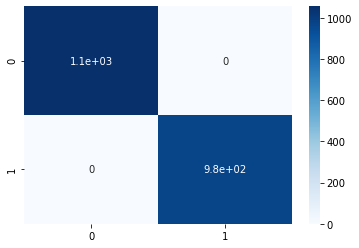

In [37]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")

In [ ]:
#задача на случайный лес- предсказать класс


In [4]:
train_data = pd.read_csv('invasion.csv')

In [5]:
train_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [6]:
Y_train = train_data['class']
X_train = train_data.drop('class', axis = 1)

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)


RandomForestClassifier()

In [8]:
parametrs = {'n_estimators': range(1, 20, 2), 'max_depth' : range(1, 13, 1), 'min_samples_leaf': range(1, 8)
                                , 'min_samples_split': (2, 10, 2)}

In [9]:
grid_clf = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)

In [10]:
grid_clf.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 13),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': (2, 10, 2),
                         'n_estimators': range(1, 20, 2)})

In [28]:
grid_clf.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 3}

In [29]:
best_clf = RandomForestClassifier(max_depth =  2,
 min_samples_leaf= 1,
 min_samples_split = 2,
 n_estimators = 3)

In [30]:
best_clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, n_estimators=3)

In [31]:
data_test = pd.read_csv('operative_information.csv')
data_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [32]:
y_pred = best_clf.predict(data_test)
pd.Series(y_pred).value_counts()

fighter      675
transport    594
cruiser      231
dtype: int64

<AxesSubplot:>

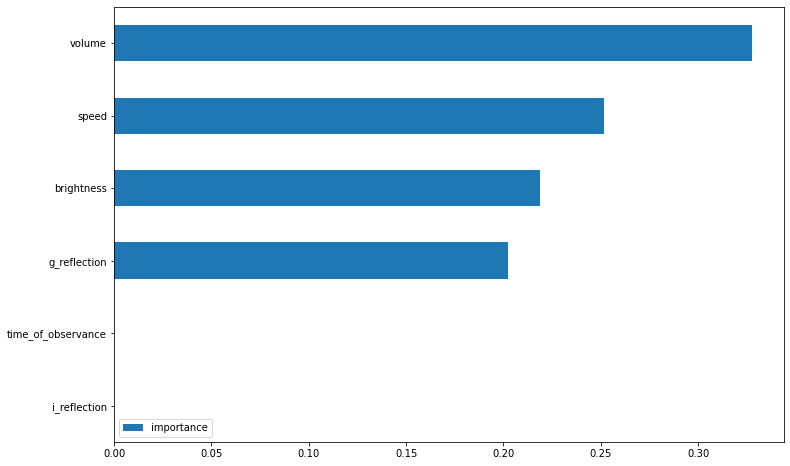

In [34]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [49]:
space = pd.read_csv('space_can_be_a_dangerous_place.csv')
space.dangerous.unique()


array([1, 0], dtype=int64)

In [52]:
x = space.drop('dangerous', axis = 1)
y = space.dangerous

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
parametrs = {'n_estimators': range(1, 30, 2), 'max_depth' : range(1, 20, 1), 'min_samples_leaf': range(1, 8)
                                , 'min_samples_split': (2, 10, 2)}
grid_s_clf = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)
grid_s_clf.fit(X_train, y_train)
grid_s_clf.best_params_

In [ ]:
best_clf = RandomForestClassifier(n_estimators=, max_depth , min_samples_leaf
                                , )